<a href="https://colab.research.google.com/github/AryaWicaksanaH/PCVK_Ganjil_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Arya Wicaksana Hidayat**

**Kelas : TI-3F**

**Absen : 07**

# MODUL11 – MetodeDeteksiObjek: TemplateMatching,Edge Detection,CornerDetection,GridDetection,ContourDetection

**E. Pengayaan Materi KTP**

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Muat 2 library berikut sebagai tahapan persiapan

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori
dataset tersebut

In [ ]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/dataset/Sliced/"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle
dapat direduksi


In [ ]:
# Filtering
for i in range(10):
 blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan
binerisasi citra (thresholding)


168.0 (300, 493)


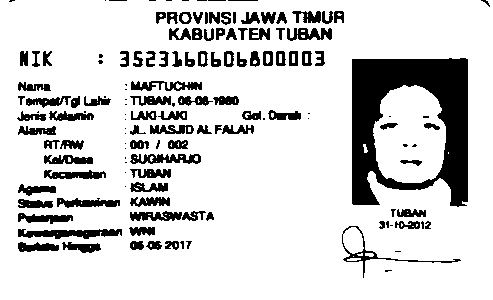

In [ ]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)
cv2_imshow(bw)

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter
atau obyek tidak berhimpitan.

In [ ]:
erode = cv2.erode(bw.copy(),
cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

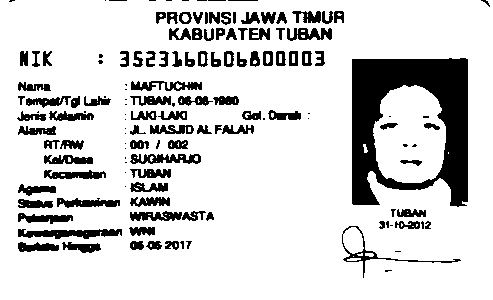

In [ ]:
contours, hierarchy = cv2.findContours(erode.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
ras = format(w / h, '.2f')
if h >= 40 and w >= 10 and float(ras) <= 1:
  cv2.rectangle(bw, (x, y), (x + w, y + h), (0, 255,0), thickness=1)
  print("+ x={}, y={}, w={}, h={}, rasio={}".format(x,y, w, h, ras))

cv2_imshow(erode)


7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.
Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di
dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu
penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran
dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain
terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik
(karena hasil akuisisi setiap citra dapat berbeda).


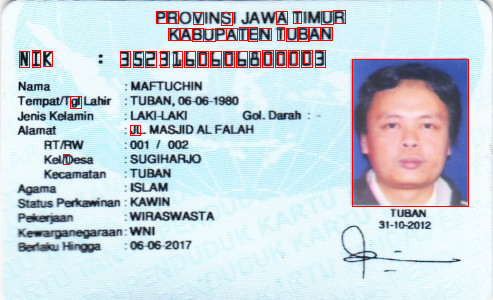

In [ ]:
# Baca gambar KTP
ktp = cv2.imread('/content/drive/MyDrive/dataset/KTP_more/ktp3.png')

# Ubah gambar menjadi skala abu-abu untuk deteksi tepi
gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # (5, 5) adalah ukuran kernel Gaussian, dan 0 adalah deviation

# Thresholding untuk membuat gambar biner
ret, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Deteksi tepi menggunakan Canny


# Temukan kontur pada gambar tepi
contours,  hierarchy= cv2.findContours(thresholded, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Tampilkan gambar dengan kontur
cv2_imshow(ktp)

# F. Tugas Praktikum

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP
untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing
yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan
secara berkelompok dengan aturan sebagai berikut:


**Kelompok 4 – KTP Edo Nias**


Nama :

-Shofiatul Ayu Anikaningrum (29)

-Salma Annissa Azizi (28)

-Bahtiar Rifa'i (09)

-Patria Anggara Susilo Putra (24)

-Arya Wicaksana Hidayat (07)



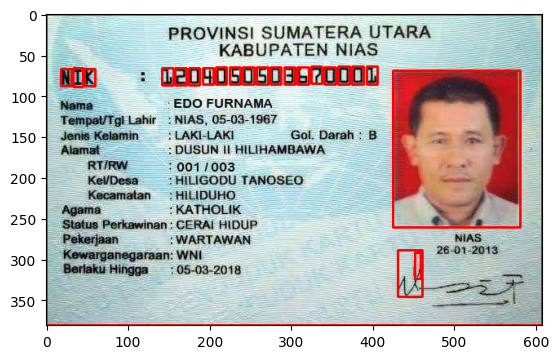

In [ ]:
import matplotlib.pyplot as plt

ktp_tugas = cv2.imread("/content/drive/MyDrive/dataset/KTP_more/ktp5.png")

blurred = cv2.GaussianBlur(ktp_tugas, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv2.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 20 and w >= 5 and float(ras) <= 3:
      cv2.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv2.cvtColor(ktp_tugas, cv2.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()